# Analizando el conjunto de datos del Titanic

In [ ]:
# !pip install numpy scipy matplotlib seaborn scikit-learn -q

El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, considerado por muchos como “insumergible”, se hundió tras chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que provocó la muerte de 1502 de los 2224 pasajeros y tripulantes.

Si bien hubo un elemento de suerte involucrado en la supervivencia, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, analizaremos este conjunto de datos para responder a la pregunta: “¿Qué tipo de personas tenían más probabilidades de sobrevivir?” utilizando datos de los pasajeros (es decir, nombre, edad, género, clase socioeconómica, etc.).

Fuente: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/overview)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('datasets/titanic_train.csv')
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

* PassengerId: Serial ID
* Survived: 1 = survived, 0 = didn't survive
* PClass:  Passenger class (1, 2, or 3)
* Name: Full name of the passenger
* Sex: Male or Female
* Age: Age in years. Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* SibSp: # of siblings or spouses aboard the Titanic
* Parch: # of parents of children aboard the Titanic
* Ticket: Ticket number
* Fare: Passenger fare
* Cabin: Cabin number
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southhampton)

In [ ]:
len(df)

891

In [ ]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [ ]:
df['Age'].min(), df['Age'].max()

(0.42, 80.0)

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df['Survived'].value_counts() * 100 / len(df)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:>

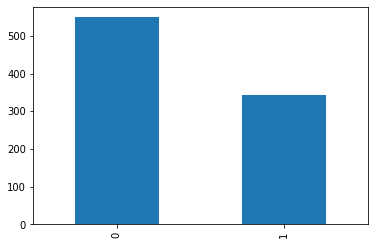

In [ ]:
%matplotlib inline
alpha_color = 0.5
df['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

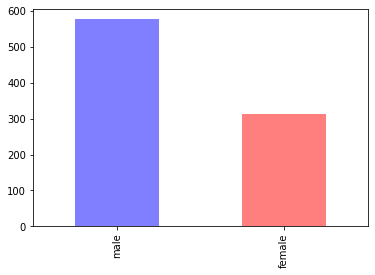

In [ ]:
df['Sex'].value_counts().plot(kind='bar', color=['b','r'], alpha=alpha_color)

<AxesSubplot:>

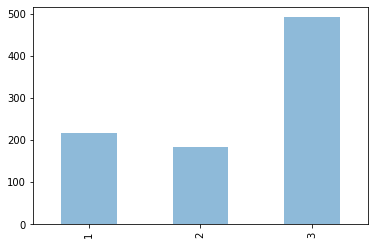

In [ ]:
df['Pclass'].value_counts().sort_index().plot(kind='bar', alpha=alpha_color)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

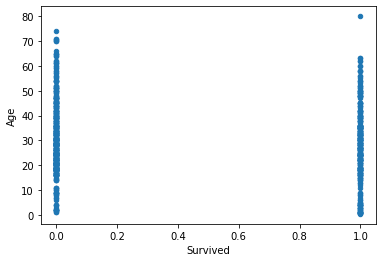

In [ ]:
df.plot(kind='scatter', x='Survived', y='Age')

<AxesSubplot:>

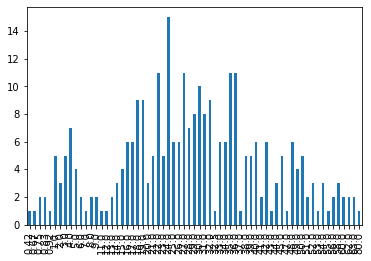

In [ ]:
df[df['Survived'] == 1]['Age'].value_counts().sort_index().plot(kind='bar')

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df['AgeBin'] = pd.cut(df['Age'], bins)
#df

<AxesSubplot:>

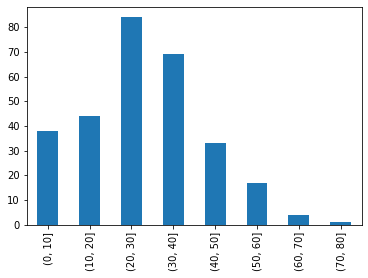

In [ ]:
df[df['Survived'] == 1]['AgeBin'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

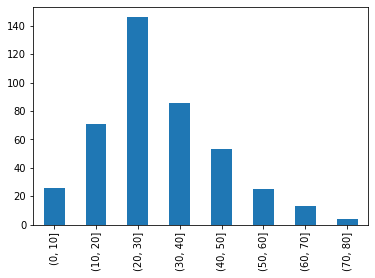

In [ ]:
df[df['Survived'] == 0]['AgeBin'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

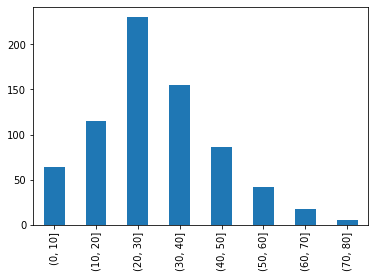

In [ ]:
df['AgeBin'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

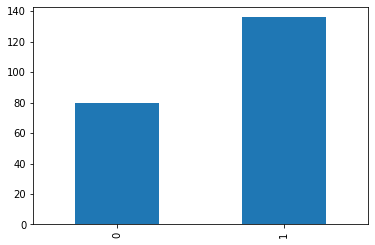

In [ ]:
df[df['Pclass'] == 1]['Survived'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

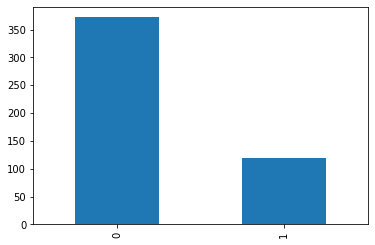

In [ ]:
df[df['Pclass'] == 3]['Survived'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

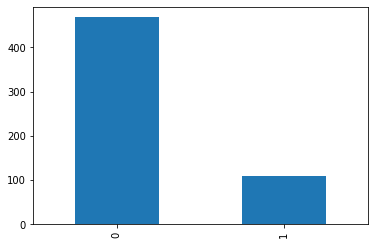

In [ ]:
df[df['Sex'] == 'male']['Survived'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

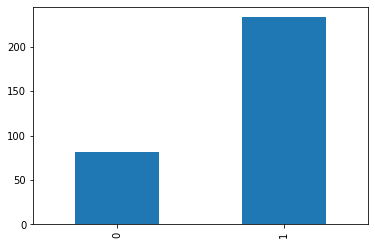

In [ ]:
df[df['Sex'] == 'female']['Survived'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

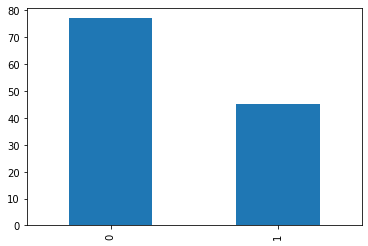

In [ ]:
df[(df['Sex'] == 'male') & (df['Pclass'] == 1)]['Survived'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

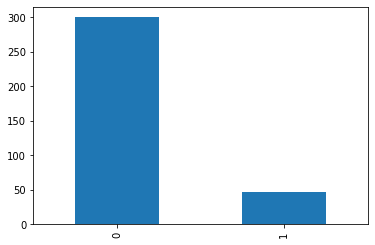

In [ ]:
df[(df['Sex'] == 'male') & (df['Pclass'] == 3)]['Survived'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

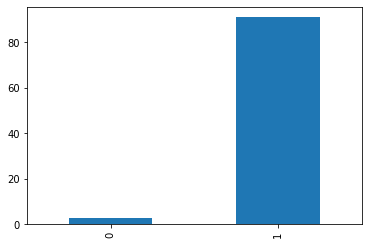

In [ ]:
df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]['Survived'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

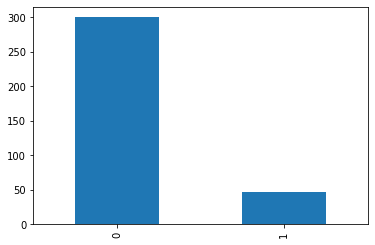

In [ ]:
df[(df['Sex'] == 'male') & (df['Pclass'] == 3)]['Survived'].value_counts().sort_index().plot(kind='bar')

In [ ]:
print('Correlación Pearson: ', df['Pclass'].corr(df['Survived'], method='pearson'))
print('Correlación spearman: ', df['Pclass'].corr(df['Survived'], method='spearman'))
print('Correlación kendall: ', df['Pclass'].corr(df['Survived'], method='kendall'))

Correlación Pearson:  -0.3384810359610148
Correlación spearman:  -0.33966793665005257
Correlación kendall:  -0.3235331843940954


In [ ]:
from scipy import stats
from scipy.stats import pearsonr

In [ ]:
r, p = stats.pearsonr(df['Pclass'], df['Survived'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(df['Pclass'], df['Survived'])
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(df['Pclass'], df['Survived'])
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=-0.33848103596101514, p-value=2.5370473879790813e-25
Correlación Spearman: r=-0.33966793665005257, p-value=1.6876081409966057e-25
Correlación Pearson: r=-0.3235331843940954, p-value=3.932785644652632e-24


In [ ]:
df['Pclass'].cov(df['Survived'])

-0.1377028714107364

In [ ]:
survived = df[df['Sex'] == 'male']
survived

PassengerId  Survived  Pclass                            Name   Sex  \
0              1         0       3         Braund, Mr. Owen Harris  male   
4              5         0       3        Allen, Mr. William Henry  male   
5              6         0       3                Moran, Mr. James  male   
6              7         0       1         McCarthy, Mr. Timothy J  male   
7              8         0       3  Palsson, Master. Gosta Leonard  male   
..           ...       ...     ...                             ...   ...   
883          884         0       2   Banfield, Mr. Frederick James  male   
884          885         0       3          Sutehall, Mr. Henry Jr  male   
886          887         0       2           Montvila, Rev. Juozas  male   
889          890         1       1           Behr, Mr. Karl Howell  male   
890          891         0       3             Dooley, Mr. Patrick  male   

      Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    22.0      1      0         A/5 21171   7.2500   NaN        S   
4    35.0      0      0            373450   8.0500   NaN        S   
5     NaN      0      0            330877   8.4583   NaN        Q   
6    54.0      0      0             17463  51.8625   E46        S   
7     2.0      3      1            349909  21.0750   NaN        S   
..    ...    ...    ...               ...      ...   ...      ...   
883  28.0      0      0  C.A./SOTON 34068  10.5000   NaN        S   
884  25.0      0      0   SOTON/OQ 392076   7.0500   NaN        S   
886  27.0      0      0            211536  13.0000   NaN        S   
889  26.0      0      0            111369  30.0000  C148        C   
890  32.0      0      0            370376   7.7500   NaN        Q   

           AgeBin  
0    (20.0, 30.0]  
4    (30.0, 40.0]  
5             NaN  
6    (50.0, 60.0]  
7     (0.0, 10.0]  
..            ...  
883  (20.0, 30.0]  
884  (20.0, 30.0]  
886  (20.0, 30.0]  
889  (20.0, 30.0]  
890  (30.0, 40.0]  

[577 rows x 13 columns]

In [ ]:
temp = df[['Sex', 'Pclass', 'Survived']]
temp

Sex  Pclass  Survived
0      male       3         0
1    female       1         1
2    female       3         1
3    female       1         1
4      male       3         0
..      ...     ...       ...
886    male       2         0
887  female       1         1
888  female       3         0
889    male       1         1
890    male       3         0

[891 rows x 3 columns]